In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

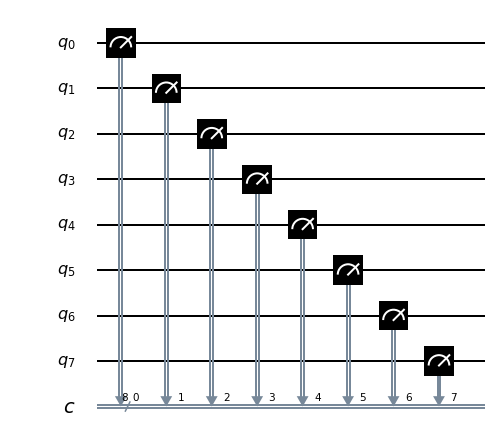

In [2]:
# Making 8 qubits to experiment with 
# These qubits compose a circuit the basic unit to perform operations 
n = 8
qc_output = QuantumCircuit(n,n)
for j in range(n):
    qc_output.measure(j,j)

qc_output.draw(output='mpl')

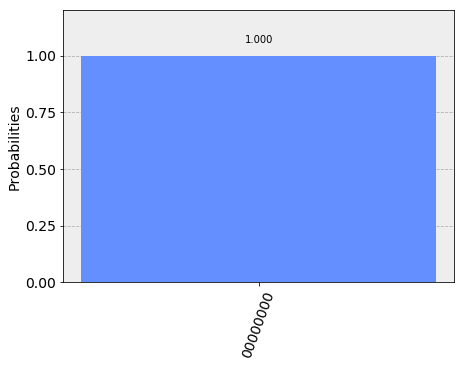

In [3]:
# It is typical to run quantum programs an iterative number of times 
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

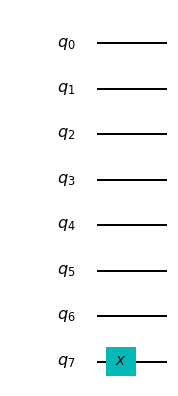

In [4]:
#Using NOT gates 
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw(output='mpl')

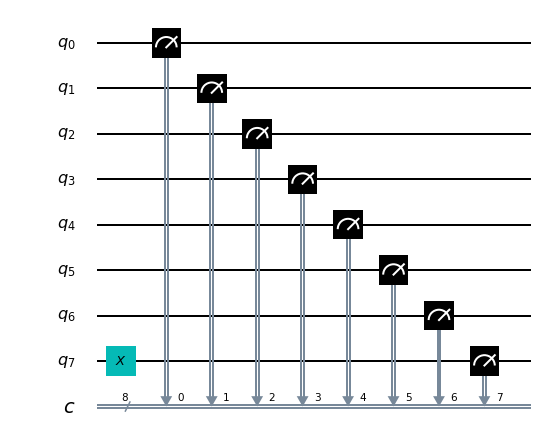

In [5]:
qc = qc_encode + qc_output
qc.draw(output='mpl',justify='none')

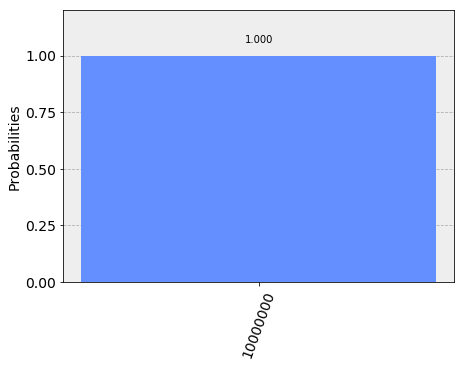

In [7]:
#Demonstrates that one of the qubits flipped 
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

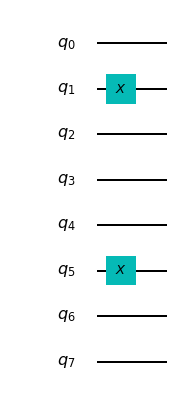

In [8]:
#Adding addition not gates 
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)
qc_encode.draw(output='mpl')

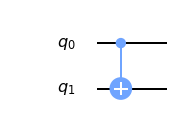

In [10]:
#Using a Controlled Not gate, essentially a XOR gate 
#It writes over the target qubit with the answer.
#The target becomes 0 if they are the same, and 1 if they are different.
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw(output='mpl')

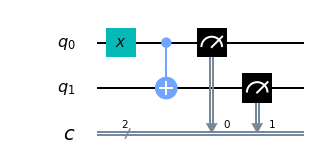

In [11]:
# The CNOT sees that qubit 0 is in state 1, and so applies a NOT to qubit 1.
# This flips the 0 of qubit 1 into a 1, and so turns 01 into 11.
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

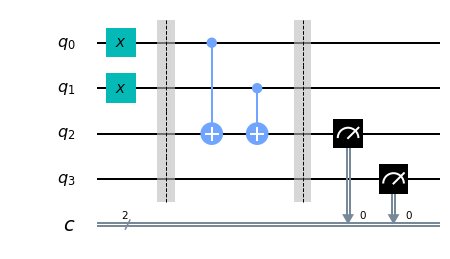

In [12]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,0)

qc_ha.draw(output='mpl')

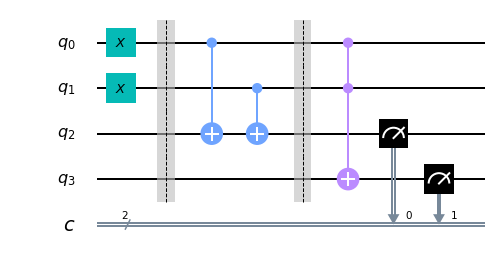

In [13]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw(output='mpl')